In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [11]:
def scatter_plot(x_: np.ndarray,
                 y_: np.ndarray,
                 name_x: str,
                 name_y: str,
                 ax=None):
    """
    scatter plot
    """
    data = pd.DataFrame(np.concatenate([x_, y_], axis=1),
                    columns=[name_x, name_y])
    if ax is None:
        sns.jointplot(data=data, x=name_x, y=name_y, kind="reg")
    else:
        sns.jointplot(data=data, x=name_x, y=name_y, kind="reg", ax=ax)

In [12]:
def performance_metrics_of_regression(labels: np.ndarray,
                                      predictions: np.ndarray) -> tuple:
    """
    Compute standard performance metrics for regression: mse and Rsquared
    """
    mse = ((predictions - labels) ** 2).mean()
    r2 = 1 - mse / (labels ** 2).mean()
    print(f'r2 = {"%.2f" % r2}, mse = {"%.2f" % mse}')

    return mse, r2

#We now experiment with random features ([Random Features for Large-Scale Kernel Machines](https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf)) applied to the classic dataset from [A Comprehensive Look at the Empirical Performance of Equity Premium Prediction](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=517667) and implemented in [The Virtue of Complexity in Return Prediction](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3984925). We will also load the FRED-MD dataset from [FRED-MD](https://research.stlouisfed.org/wp/more/2015-012)

In [13]:
# AND NOW WE START WORKING WITH REAL DATA
# import os
# from google.colab import drive
# import pandas as pd
# drive.mount('/content/gdrive')
# folder = '/content/gdrive/My Drive/macro_data'

goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

#fred_data = pd.read_csv(os.path.join(folder,'FRED_MD.csv'), index_col=0).iloc[1:, :]
#fred_data.index = pd.to_datetime(fred_data.index)

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [14]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


<Axes: xlabel='yyyymm'>

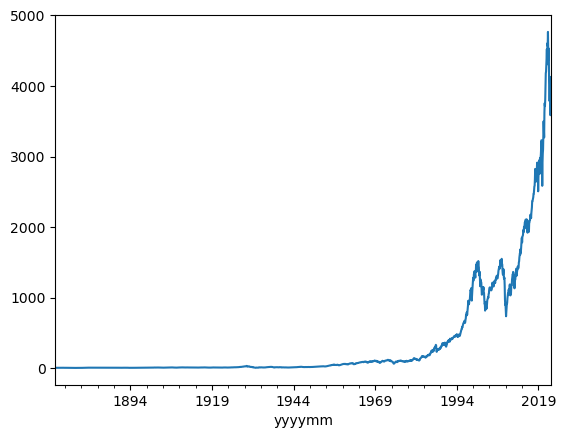

In [15]:
goyal_welch_data['Index'].plot()

<Axes: xlabel='yyyymm'>

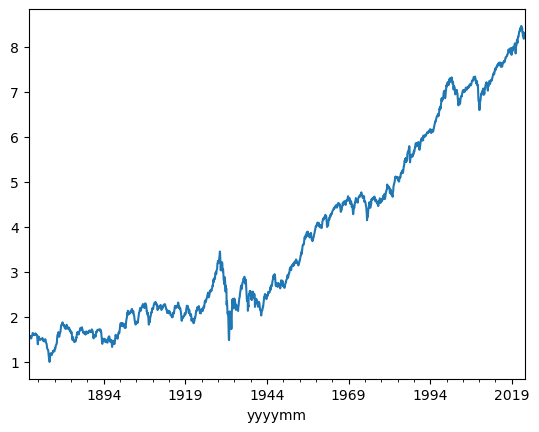

In [16]:
np.log(goyal_welch_data['Index']).plot()

In [17]:
goyal_welch_data.columns

Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
       'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw',
       'CRSP_SPvwx'],
      dtype='object')

<Axes: xlabel='yyyymm'>

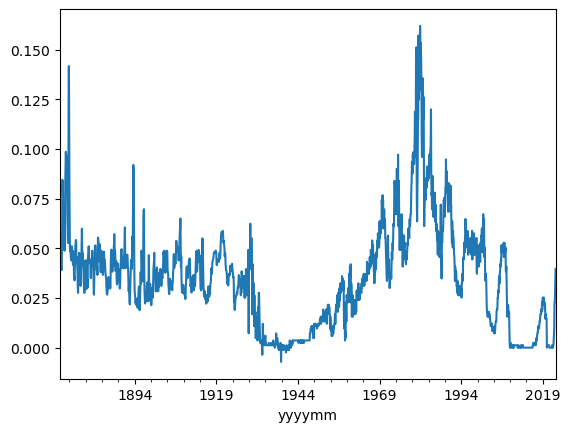

In [18]:
(12 * goyal_welch_data.Rfree).plot()

In [19]:
goyal_welch_data.tail(20)


,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
2021-05-01,4204.11,57.7878,148.5733,0.184798,0.0002,0.0296,0.0362,0.0162,0.017464,0.0000,0.008017,0.0001,0.0045,0.001496,NaN,0.006208,0.004737
2021-06-01,4297.50,57.8650,158.7600,0.184942,0.0004,0.0279,0.0344,0.0152,0.017255,0.0000,0.009291,0.0284,0.0442,0.000607,NaN,0.023682,0.022564
2021-07-01,4395.26,58.3282,164.2967,0.182650,0.0005,0.0257,0.0324,0.0132,0.016079,0.0000,0.004811,0.0305,0.0239,0.001124,NaN,0.024305,0.023309
2021-08-01,4522.68,58.7913,169.8333,0.180453,0.0005,0.0255,0.0324,0.0128,0.014846,0.0000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205
2021-09-01,4307.54,59.2545,175.3700,0.188541,0.0004,0.0253,0.0323,0.0137,0.015598,0.0000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152
2021-10-01,4605.38,59.6354,182.8700,0.178142,0.0005,0.0268,0.0335,0.0158,0.013368,0.0000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627
2021-11-01,4567.00,60.0162,190.3700,0.185043,0.0005,0.0262,0.0328,0.0156,0.015640,0.0001,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008666
2021-12-01,4766.18,60.3971,197.8700,0.175599,0.0006,0.0265,0.0330,0.0147,0.012974,0.0000,0.003073,-0.0110,-0.0129,0.002518,NaN,0.043485,0.042285
2022-01-01,4515.55,60.9214,197.8833,0.181629,0.0015,0.0293,0.0358,0.0176,0.011640,0.0000,0.008415,-0.0227,-0.0522,0.002780,NaN,-0.052243,-0.053087


In [20]:
goyal_welch_data['returns'] = ((goyal_welch_data.Index)/ goyal_welch_data.Index.shift(1) - 1).fillna(0)

In [21]:
goyal_welch_data['returns'].describe()


count    1824.000000
mean        0.004833
std         0.047320
min        -0.299423
25%        -0.018982
50%         0.006165
75%         0.031478
max         0.422222
Name: returns, dtype: float64

In [22]:
goyal_welch_data.Rfree.describe()


count    1823.000000
mean        0.002924
std         0.002143
min        -0.000600
25%         0.001300
50%         0.002900
75%         0.004000
max         0.013500
Name: Rfree, dtype: float64

#Excess returns are defined as $R_{t+1}-r_{f,t}$ (in excess of the risk-free rate). Then, we know that, with portfolio weight $\pi_t,$ the wealth evolves as
$$
W_{t+1}\ =\ W_t(r_{f,t} + \pi_t (R_{t+1}-r_{f,t}))
$$

Text(0.5, 1.0, 'leverage = 20.0')

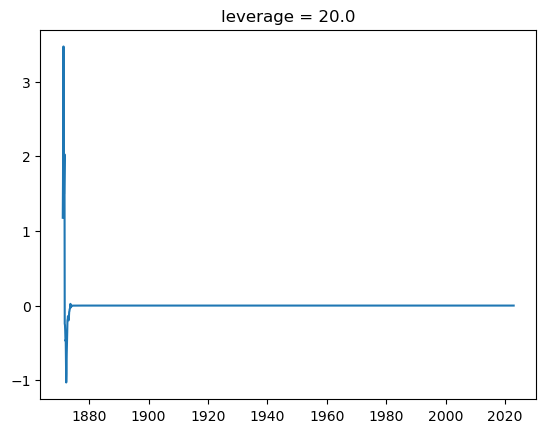

In [23]:
goyal_welch_data['excess_returns'] = goyal_welch_data.returns - goyal_welch_data.Rfree
leverage = 20.
strategy_returns = 1 + goyal_welch_data.Rfree + leverage * goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [24]:
goyal_welch_data.columns

Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
       'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw',
       'CRSP_SPvwx', 'returns', 'excess_returns'],
      dtype='object')

<Axes: xlabel='yyyymm'>

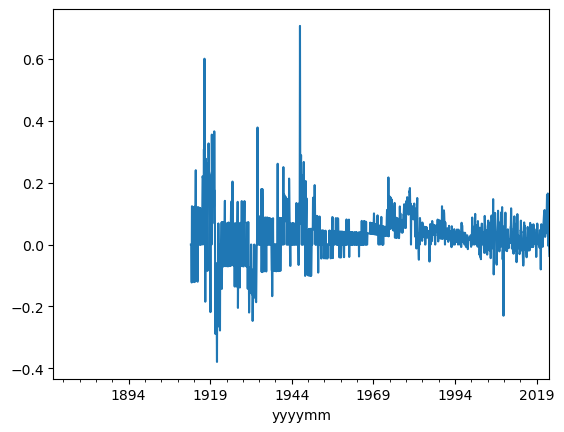

In [25]:
(12 * goyal_welch_data.infl).plot()

In [26]:
goyal_welch_data.infl.describe()


count    1319.000000
mean        0.002610
std         0.006433
min        -0.031579
25%         0.000000
50%         0.002404
75%         0.005473
max         0.058824
Name: infl, dtype: float64

In [27]:
goyal_welch_data.tail(20)



,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns,excess_returns
yyyymm,,,,,,,,,,,,,,,,,,,
2021-05-01,4204.11,57.7878,148.5733,0.184798,0.0002,0.0296,0.0362,0.0162,0.017464,0.0000,0.008017,0.0001,0.0045,0.001496,NaN,0.006208,0.004737,0.005487,0.005487
2021-06-01,4297.50,57.8650,158.7600,0.184942,0.0004,0.0279,0.0344,0.0152,0.017255,0.0000,0.009291,0.0284,0.0442,0.000607,NaN,0.023682,0.022564,0.022214,0.022214
2021-07-01,4395.26,58.3282,164.2967,0.182650,0.0005,0.0257,0.0324,0.0132,0.016079,0.0000,0.004811,0.0305,0.0239,0.001124,NaN,0.024305,0.023309,0.022748,0.022748
2021-08-01,4522.68,58.7913,169.8333,0.180453,0.0005,0.0255,0.0324,0.0128,0.014846,0.0000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205,0.028990,0.028990
2021-09-01,4307.54,59.2545,175.3700,0.188541,0.0004,0.0253,0.0323,0.0137,0.015598,0.0000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152,-0.047569,-0.047569
2021-10-01,4605.38,59.6354,182.8700,0.178142,0.0005,0.0268,0.0335,0.0158,0.013368,0.0000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627,0.069144,0.069144
2021-11-01,4567.00,60.0162,190.3700,0.185043,0.0005,0.0262,0.0328,0.0156,0.015640,0.0001,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008666,-0.008334,-0.008434
2021-12-01,4766.18,60.3971,197.8700,0.175599,0.0006,0.0265,0.0330,0.0147,0.012974,0.0000,0.003073,-0.0110,-0.0129,0.002518,NaN,0.043485,0.042285,0.043613,0.043613
2022-01-01,4515.55,60.9214,197.8833,0.181629,0.0015,0.0293,0.0358,0.0176,0.011640,0.0000,0.008415,-0.0227,-0.0522,0.002780,NaN,-0.052243,-0.053087,-0.052585,-0.052585


In [28]:
goyal_welch_data.corr()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns,excess_returns
Index,1.000000,0.976952,0.971674,-0.586955,-0.233160,-0.151000,-0.187700,-0.217137,-0.388406,-0.256399,-0.010084,-0.034677,-0.019966,0.024068,-0.394410,0.003758,0.019214,0.030394,0.041875
D12,0.976952,1.000000,0.967866,-0.566695,-0.195115,-0.089142,-0.124923,-0.156467,-0.449804,-0.226416,-0.016082,-0.010813,0.001501,0.041149,-0.591115,-0.005382,0.009796,0.024005,0.034144
E12,0.971674,0.967866,1.000000,-0.552464,-0.181918,-0.100869,-0.143726,-0.160729,-0.407763,-0.214650,0.000675,-0.018821,-0.017731,0.006350,-0.520702,-0.007065,0.007905,0.021725,0.031339
b/m,-0.586955,-0.566695,-0.552464,1.000000,0.199958,0.160981,0.260409,0.197314,0.034194,0.192322,0.073090,0.009947,-0.000043,0.169768,0.273217,-0.045084,-0.064466,-0.068189,-0.076947
tbl,-0.233160,-0.195115,-0.181918,0.199958,1.000000,0.888219,0.828238,0.901584,0.032109,0.987950,0.201720,0.053990,0.032672,-0.151561,-0.583011,-0.019120,-0.019864,-0.025131,-0.070654
AAA,-0.151000,-0.089142,-0.100869,0.160981,0.888219,1.000000,0.970474,0.988194,-0.082484,0.880914,0.159846,0.105842,0.101953,-0.047285,-0.650444,-0.009374,-0.007710,-0.011392,-0.051939
BAA,-0.187700,-0.124923,-0.143726,0.260409,0.828238,0.970474,1.000000,0.944715,-0.119387,0.824402,0.094729,0.116887,0.118228,0.074055,-0.601867,-0.011657,-0.011785,-0.016318,-0.054252
lty,-0.217137,-0.156467,-0.160729,0.197314,0.901584,0.988194,0.944715,1.000000,-0.061977,0.890538,0.184884,0.056213,0.054396,-0.099717,-0.657265,-0.010755,-0.010226,-0.014261,-0.055245
ntis,-0.388406,-0.449804,-0.407763,0.034194,0.032109,-0.082484,-0.119387,-0.061977,1.000000,0.032430,-0.055086,-0.045876,-0.042822,-0.039215,0.248873,-0.068233,-0.073075,-0.070015,-0.071395
Rfree,-0.256399,-0.226416,-0.214650,0.192322,0.987950,0.880914,0.824402,0.890538,0.032430,1.000000,0.177283,0.091004,0.066322,-0.122932,-0.587353,-0.016362,-0.016427,-0.032216,-0.077299


In [29]:
goyal_welch_data.dropna()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns,excess_returns
yyyymm,,,,,,,,,,,,,,,,,,,
1937-05-01,16.26,0.8100,1.1500,0.489382,0.0041,0.0333,0.0484,0.0282,0.028278,0.0006,0.006993,0.0053,0.0040,0.003593,0.003398,-0.005699,-0.011686,-0.010347,-0.010947
1937-06-01,15.40,0.8400,1.1700,0.504961,0.0036,0.0328,0.0493,0.0285,0.031266,0.0003,0.000000,-0.0018,0.0053,0.002984,0.004206,-0.053803,-0.057853,-0.052891,-0.053191
1937-07-01,16.98,0.8167,1.1867,0.464649,0.0028,0.0325,0.0491,0.0277,0.027225,0.0003,0.006944,0.0138,0.0039,0.002982,0.003630,0.098991,0.098012,0.102597,0.102297
1937-08-01,16.04,0.7933,1.2033,0.481935,0.0029,0.0324,0.0492,0.0286,0.031064,0.0002,0.000000,-0.0104,-0.0017,0.002141,0.003325,-0.051183,-0.056291,-0.055359,-0.055559
1937-09-01,13.76,0.7700,1.2200,0.553147,0.0031,0.0328,0.0516,0.0284,0.035847,0.0004,0.006897,0.0045,0.0025,0.015821,0.003339,-0.139610,-0.143683,-0.142145,-0.142545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,916.07,15.8790,28.9400,0.284412,0.0162,0.0637,0.0758,0.0510,0.024748,0.0014,0.003331,0.0464,0.0452,0.009409,-0.002908,0.007061,0.005401,0.004881,0.003481
2002-09-01,815.29,15.7990,30.0400,0.324555,0.0163,0.0615,0.0740,0.0480,0.029299,0.0014,0.001660,0.0417,0.0330,0.007366,-0.003213,-0.108965,-0.110421,-0.110013,-0.111413
2002-10-01,885.76,15.8907,29.2233,0.293437,0.0158,0.0632,0.0773,0.0508,0.025671,0.0014,0.001657,-0.0294,-0.0240,0.011590,-0.003753,0.088599,0.087103,0.086436,0.085036


In [30]:
goyal_welch_data


,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns,excess_returns
yyyymm,,,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013514,0.008547
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024444,0.019919
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028200,0.023948
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025316,0.020673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052,-0.042440,-0.044340
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876,-0.093396,-0.095296
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196,0.079863,0.077563


In [31]:
cleaned_data = goyal_welch_data.loc['1975':].drop(columns=['csp']).fillna(0)

In [32]:
cleaned_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,CRSP_SPvw,CRSP_SPvwx,returns,excess_returns
yyyymm,,,,,,,,,,,,,,,,,,
1975-01-01,76.98,3.6233,8.7433,0.980830,0.0626,0.0883,0.1081,0.0796,0.008510,0.0058,0.003854,0.0225,0.0596,0.004017,0.123610,0.121698,0.122812,0.117012
1975-02-01,81.59,3.6467,8.5967,0.933902,0.0550,0.0862,0.1065,0.0788,0.011652,0.0043,0.007678,0.0131,0.0137,0.002179,0.067460,0.059497,0.059886,0.055586
1975-03-01,83.36,3.6700,8.4500,0.972466,0.0549,0.0867,0.1048,0.0824,0.020467,0.0041,0.003810,-0.0267,-0.0247,0.002403,0.024014,0.022122,0.021694,0.017594
1975-04-01,87.30,3.6833,8.2867,0.909489,0.0561,0.0895,0.1058,0.0852,0.022496,0.0044,0.003795,-0.0182,-0.0052,0.002314,0.049424,0.047293,0.047265,0.042865
1975-05-01,91.15,3.6967,8.1233,0.897524,0.0523,0.0890,0.1069,0.0836,0.022954,0.0044,0.005671,0.0212,0.0106,0.001807,0.051193,0.044794,0.044101,0.039701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000354,-0.0421,-0.0293,0.003349,-0.040305,-0.042052,-0.042440,-0.044340
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,0.002151,-0.0769,-0.0526,0.004934,-0.091495,-0.092876,-0.093396,-0.095296
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.0023,0.004056,-0.0139,-0.0103,0.006504,0.080248,0.079196,0.079863,0.077563


In [33]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
1975-01-01  0.000000  0.000000  0.000000  0.980830  0.0626  0.0883  0.1081   
1975-02-01  1.059886  1.006458  0.983233  0.933902  0.0550  0.0862  0.1065   
1975-03-01  1.021694  1.006389  0.982935  0.972466  0.0549  0.0867  0.1048   
1975-04-01  1.047265  1.003624  0.980675  0.909489  0.0561  0.0895  0.1058   
1975-05-01  1.044101  1.003638  0.980282  0.897524  0.0523  0.0890  0.1069   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

# **Do not forget to shift the signals !!!!**

In [34]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((576, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

# Now comes (as usual) our favorite regression function
# Recall that we would like to compute $(zI+SS'/T)^{-1}$ for many values of $z.$ Doing this is slow because matrix inversion is slow. Instead, we will only pay the cost of matrix manipulations just once. We do this by performing the eigenvalue decomposition
$$
SS'/T\ =\ U DU'
$$
#and then use the mathematical formula
$$
(zI+SS'/T)^{-1}\ =\ U (zI+D)^{-1}U'\,.
$$
#The **estimated** regression coefficients for $y=S\beta+\epsilon$ are
$$
\hat\beta(z)\ =\ (zI+S'S/T)^{-1}S'y/T\ =\ S'(zI+SS'/T)^{-1}y/T
$$
#and we can thus rewrite it as
$$
S'(zI+SS'/T)^{-1}y/T\ =\ S'U (zI+D)^{-1}U' y/T\,.
$$
#So we proceed as follows. First, we compute
$$
\mu\ =\ U' y/T
$$
#Now, let $\delta$ be the vector of diagoal elements of $D$. Then,
$$
[(z_1I+D)^{-1}\mu, \cdots, (z_KI+D)^{-1}\mu]\ =\ [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}]*\mu
$$
#Here, $[(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}]$ is the matrix with $K$ columns and $T$ rows, because $\mu$ and $\delta$ are $T$-dimensional.


In [35]:
def ridge_regr(signals: np.ndarray,
                labels: np.ndarray,
                future_signals: np.ndarray,
                shrinkage_list: np.ndarray):
    """
    Regression is
    beta = (zI + S'S/t)^{-1}S'y/t = S' (zI+SS'/t)^{-1}y/t
    Inverting matrices is costly, so we use eigenvalue decomposition:
    (zI+A)^{-1} = U (zI+D)^{-1} U' where UDU' = A is eigenvalue decomposition,
    and we use the fact that D @ B = (diag(D) * B) for diagonal D, which saves a lot of compute cost
    :param signals: S
    :param labels: y
    :param future_signals: out of sample y
    :param shrinkage_list: list of ridge parameters
    :return:
    """
    t_ = signals.shape[0]
    p_ = signals.shape[1]
    if p_ < t_:
        # this is standard regression
        eigenvalues, eigenvectors = np.linalg.eigh(signals.T @ signals / t_)
        means = signals.T @ labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)
        betas = eigenvectors @ intermed
    else:
        # this is the weird over-parametrized regime
        eigenvalues, eigenvectors = np.linalg.eigh(signals @ signals.T / t_)
        means = labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means # this is \mu

        # now we build [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}] * \mu
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)

        tmp = eigenvectors.T @ signals # U.T @ S
        betas = tmp.T @ intermed # (S.T @ U) @ [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}] * \mu
    predictions = future_signals @ betas
    return betas, predictions

# Sometimes, data normalization can be important. We introduce a function to do it here

In [36]:
def normalize(data: np.ndarray,
              ready_normalization: dict = None,
              use_std: bool = False)->tuple:
  """

  """

  if ready_normalization is None:
      data_std = data.std(0)
      data_mean = data.mean(0)
      if use_std:
        data = (data - data_mean) / data_std # this is z-scoring of the data
      else:
        data_max = np.max(data, axis=0)
        data_min = np.min(data, axis=0)
  else:
      data_std = ready_normalization['std']
      data_mean = ready_normalization['mean']
      if use_std:
        data = (data - data_mean) / data_std # this is z-scoring of the data
      else:
        data_max = ready_normalization['max']
        data_min = ready_normalization['min']
  if not use_std:
    data = data - data_min
    data = data/(data_max - data_min)
    data = data - 0.5
  normalization = {'std': data_std,
                   'mean': data_mean,
                    'max': data_max,
                    'min': data_min}
  return data, normalization

In [37]:
signals.shape

(576, 14)

In [38]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], use_std=False)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
1999-01-01      0.009543      0.009092      0.007284      0.004818   
1999-02-01      0.015348      0.014633      0.012050      0.008699   
1999-03-01      0.014913      0.014206      0.011071      0.004480   
1999-04-01      0.007202      0.006806      0.005462      0.003982   
1999-05-01      0.001412      0.001351      0.001362      0.002007   
...                  ...           ...           ...           ...   
2022-08-01      0.046798      0.046666      0.044075      0.033953   
2022-09-01      0.036718      0.037005      0.035455      0.025308   
2022-10-01      0.038865      0.039269      0.037353      0.023677   
2022-11-01      0.020442      0.020672      0.019790      0.016015   
2022-12-01      0.060363      0.058995      0.052246      0.035624   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [39]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,-0.167303,-0.159601,-0.130285,-0.069307,-0.014889,0.000076,0.000762,0.000142,1.549110e-05,1.562616e-06
D12,0.180899,0.162892,0.093572,0.016680,-0.002365,0.001341,0.001036,0.000185,2.005901e-05,2.022582e-06
E12,-0.088444,-0.078983,-0.039291,-0.011646,-0.006927,0.000515,0.000883,0.000164,1.782316e-05,1.797794e-06
b/m,-0.016628,-0.013634,-0.004574,0.003893,0.005397,-0.001441,-0.000636,-0.000075,-7.659179e-06,-7.671822e-07
tbl,0.016020,0.010323,-0.008836,-0.026716,-0.017815,-0.006173,-0.001162,-0.000139,-1.419952e-05,-1.423648e-06
AAA,-0.519029,-0.423729,-0.164298,-0.029179,-0.008365,-0.002811,-0.000358,-0.000024,-2.120977e-06,-2.090445e-07
BAA,0.328485,0.283318,0.148801,0.034569,0.000659,-0.001719,-0.000246,-0.000012,-9.132475e-07,-8.808999e-08
lty,0.138702,0.093150,-0.017957,-0.025374,-0.009406,-0.003268,-0.000447,-0.000035,-3.263387e-06,-3.236817e-07
ntis,-0.022685,-0.023374,-0.025496,-0.026361,-0.021754,-0.007680,-0.000882,-0.000078,-7.580134e-06,-7.556455e-07
Rfree,-0.023104,-0.021428,-0.014251,-0.007282,-0.010906,-0.005005,-0.001032,-0.000126,-1.300944e-05,-1.304865e-06


# Now we compute managed returns $\pi_t(z) \cdot R_{t+1}.$ Because we are predicting the market, we are "timing the market" and hence we will also call them "market timing returns"

In [40]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
1999-01-01      0.000358      0.000341      0.000273      0.000181   
1999-02-01     -0.000549     -0.000524     -0.000431     -0.000311   
1999-03-01      0.000514      0.000490      0.000382      0.000155   
1999-04-01      0.000247      0.000233      0.000187      0.000136   
1999-05-01     -0.000040     -0.000038     -0.000039     -0.000057   
...                  ...           ...           ...           ...   
2022-08-01     -0.002075     -0.002069     -0.001954     -0.001505   
2022-09-01     -0.003499     -0.003526     -0.003379     -0.002412   
2022-10-01      0.003015      0.003046      0.002897      0.001836   
2022-11-01      0.001040      0.001051      0.001006      0.000814   
2022-12-01     -0.003759     -0.003674     -0.003253     -0.002218   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [41]:
def sharpe_ratio(x):
  # We are computing the ANNUALIZED SHARPE RATIO, hence we need to multiply by sqrt(12)
  return np.round(np.sqrt(12) * x.mean(0) / x.std(0), 2)

In [42]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [43]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)


Text(0.5, 1.0, 'SR=[0.28 0.22 0.24 0.31 0.36 0.35 0.33 0.32 0.32 0.32 0.32]')

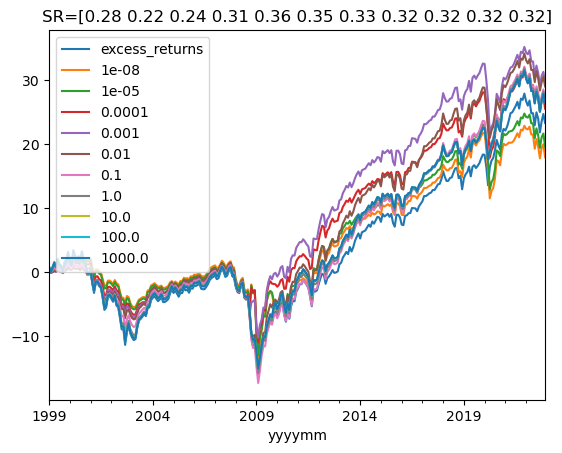

In [44]:
tmp.cumsum().plot()
plt.title(f'SR={sr.values.flatten()}')

# We now investigate the statistical significance of our strategy performance relative to that of the two benchmarks: the market and the simple, linear strategy. To this end, we run the following regression
$$
R_{t+1}^{simple\ linear}\ =\ \alpha\ +\ \beta R_{t+1}^{market}
$$
#We would like to see a large positive t-statistic for the $\alpha$ coefficient

In [45]:
import statsmodels.api as sm

def regression_with_tstats(predicted_variable, explanatory_variables):
    x_ = explanatory_variables
    x_ = sm.add_constant(x_)
    y_ = predicted_variable
    # Newey-West standard errors with maxlags
    z_ = x_.copy().astype(float)
    result = sm.OLS(y_.values, z_.values).fit(cov_type='HAC', cov_kwds={'maxlags': 10})
    try:
        tstat = np.round(result.summary2().tables[1]['z'], 1)  # alpha t-stat (because for 'const')
        tstat.index = list(z_.columns)
    except:
        print(f'something is wrong for t-stats')
    return tstat

In [46]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const              1.7
excess_returns    45.6
Name: z, dtype: float64


In [47]:
tmp[1.]

yyyymm
1999-01-01    0.709685
1999-02-01   -0.708662
1999-03-01    0.599746
1999-04-01    0.620578
1999-05-01   -0.507196
                ...   
2022-08-01   -0.964922
2022-09-01   -2.180198
2022-10-01    1.672453
2022-11-01    1.112251
2022-12-01   -1.374240
Freq: MS, Name: 1.0, Length: 288, dtype: float64

# **NOW COME THE RANDOM FEATURES**

#The scale of random weights entering random features is very important.

#There are two equivalent ways to control the scale of your linear random features. One is to generate $\omega\sim N(0,1)$ and then use $\gamma\cdot \omega$ for some $\gamma\in \mathbb R$. This $\gamma$ controls the scale of the your features. Another way is to directly sample $\omega\sim N(0, \gamma^2).$ Mathematically, this is based on the important observation that if $\omega\sim N(0,1)$, then $\gamma\omega\sim N(0, \gamma^2).$

#The intuition is based on the Taylor approximation.  We have $h(\gamma \cdot \omega'x) \approx h(0)+h'(0) \gamma \omega' x$ when $\gamma$ is small enough. That is, our non-linear random features become approximately linear. **Thus, the bigger $\gamma$ is, the more non-linear the features are.**

#**This scale is also important for neural networks, and is pinned down through initialization!**

In [48]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [49]:
random_features.shape


(576, 100000)

In [50]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
1999-01-01      0.098198      0.035494      0.050602      0.048500   
1999-02-01      0.174407      0.070974      0.081037      0.066401   
1999-03-01     -0.032752     -0.073249     -0.010448      0.019655   
1999-04-01      0.000811      0.050647      0.052701      0.049371   
1999-05-01     -0.163197     -0.010264      0.031429      0.031359   
...                  ...           ...           ...           ...   
2022-08-01     -3.531028      1.237872      1.133340      0.610439   
2022-09-01     -0.440195      0.112675      0.245918      0.175386   
2022-10-01     -0.089086     -0.006154      0.134254      0.095747   
2022-11-01     -0.755424      0.247039      0.212108      0.114592   
2022-12-01     -1.997508      0.205460      0.271676      0.204741   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

NameError: name 'os' is not defined

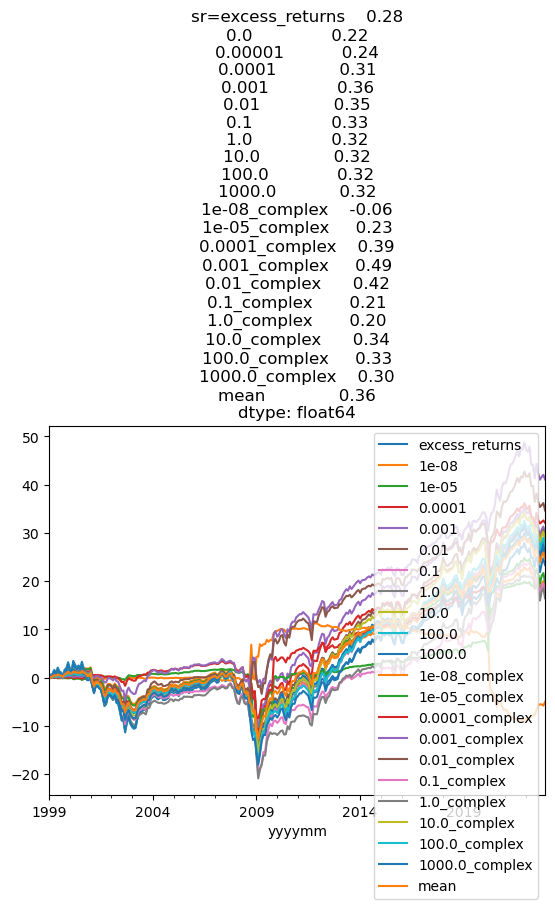

In [51]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'sr={sr}')
plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))



In [ ]:
cleaned_data.corr()[0.001]


,0.001
Index,0.733777
D12,-0.047179
E12,0.103751
b/m,0.048345
tbl,-0.113732
AAA,-0.105989
BAA,-0.112591
lty,-0.085730
ntis,0.005258
Rfree,-0.116570


In [ ]:
import statsmodels.api as sm

def regression_with_tstats(predicted_variable, explanatory_variables):
    x_ = explanatory_variables
    x_ = sm.add_constant(x_)
    y_ = predicted_variable
    # Newey-West standard errors with maxlags
    z_ = x_.copy().astype(float)
    result = sm.OLS(y_.values, z_.values).fit(cov_type='HAC', cov_kwds={'maxlags': 10})
    try:
        tstat = np.round(result.summary2().tables[1]['z'], 1)  # alpha t-stat (because for 'const')
        tstat.index = list(z_.columns)
    except:
        print(f'something is wrong for t-stats')
    return tstat

# We now investigate the statistical significance of our strategy performance relative to that of the two benchmarks: the market and the simple, linear strategy. To this end, we run the following regression
$$
R_{t+1}^{complex}\ =\ \alpha\ +\ \beta_1 R_{t+1}^{market}\ +\ \beta_2 R_{t+1}^{simple\ linear}
$$
#We would like to see a large positive t-statistic for the $\alpha$ coefficient

In [ ]:
tstats = regression_with_tstats(predicted_variable=tmp['0.001_complex'], explanatory_variables=tmp[['excess_returns', 0.001]])
print(tstats)

const             1.5
excess_returns    0.7
0.001             2.0
Name: z, dtype: float64
